# Basis generators

Author: Yoann Pradat

Affiliation: Uhlmann's lab, EMBL-EBI

Date: May, 29th 2019

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
plt.rcParams['text.usetex'] = True

# For removing 0 from axis tick labels
func = lambda x, pos: "" if np.isclose(x,0) else x

cmap = cm.get_cmap('tab10')
colors = [cmap(i) for i in range(10)]

In [2]:
def d_operator(f, x, r):
    if r==0:
        return f(x)
    else:
        eps = 1e-4
        return (d_operator(f, x+eps, r-1) - d_operator(f, x-eps, r-1))/(2*eps)

# I. Basis generators used in Romani Conti et al paper Ellipse-preserving Hermite interpolation and subdivion

In [3]:
def _Dg_1(w, x, order=1):
    assert 0 <= x
    if 1 < x:
        return 0
    else:
        qw = np.exp(w*1j)*(w*1j-2) + w*1j+2
        aw = (w*1j + 1 + np.exp(w*1j)*(w*1j-1))/qw
        bw = -w*1j*(np.exp(w*1j)+1)/qw
        cw = 1/qw
        dw = -np.exp(w*1j)/qw

        if order==0:
            return (aw + bw*x + cw*np.exp(w*x*1j) + dw*np.exp(-w*x*1j)).real
        elif order==1:
            return (bw + cw*w*1j*np.exp(w*x*1j) - dw*w*1j*np.exp(-w*x*1j)).real
        else:
            return (cw*(w*1j)**order*np.exp(w*x*1j) + dw*(-w*1j)**order*np.exp(-w*x*1j)).real

def _Dg_2(w, x, order=1):
    assert 0 <= x
    if 1 < x:
        return 0
    else:
        qw = np.exp(w*1j)*(w*1j-2) + w*1j+2
        pw = np.exp(2*w*1j)*(w*1j-1) + w*1j+1
        aw = pw/(w*1j*(np.exp(w*1j)-1)*qw)
        bw = -(np.exp(w*1j) -1)/qw
        cw = (np.exp(w*1j)-w*1j-1)/(w*1j*(np.exp(w*1j)-1)*qw)
        dw = -np.exp(w*1j)*(np.exp(w*1j)*(w*1j-1)+1)/(w*1j*(np.exp(w*1j)-1)*qw)

        if order==0:
            return (aw + bw*x + cw*np.exp(w*x*1j) + dw*np.exp(-w*x*1j)).real
        elif order==1:
            return (bw + cw*w*1j*np.exp(w*x*1j) - dw*w*1j*np.exp(-w*x*1j)).real
        else:
            return (cw*(w*1j)**order*np.exp(w*x*1j) + dw*(-w*1j)**order*np.exp(-w*x*1j)).real

In [4]:
def phi_1(w, x):
    if 1 <= np.abs(x):
        return 0
    else:
        qw = np.exp(w*1j)*(w*1j-2) + w*1j+2
        aw = (w*1j + 1 + np.exp(w*1j)*(w*1j-1))/qw
        bw = -w*1j*(np.exp(w*1j)+1)/qw
        cw = 1/qw
        dw = -np.exp(w*1j)/qw
        return (aw + bw*np.abs(x) + cw*np.exp(w*np.abs(x)*1j) + dw*np.exp(-w*np.abs(x)*1j)).real

def phi_2(w, x):
    if 1 <= np.abs(x):
        return 0
    else:
        qw = np.exp(w*1j)*(w*1j-2) + w*1j+2
        pw = np.exp(2*w*1j)*(w*1j-1) + w*1j+1
        aw = pw/(w*1j*(np.exp(w*1j)-1)*qw)
        bw = -(np.exp(w*1j) -1)/qw
        cw = (np.exp(w*1j)-w*1j-1)/(w*1j*(np.exp(w*1j)-1)*qw)
        dw = -np.exp(w*1j)*(np.exp(w*1j)*(w*1j-1)+1)/(w*1j*(np.exp(w*1j)-1)*qw)

        if 0 <= x:
            return (aw + bw*x + cw*np.exp(w*x*1j) + dw*np.exp(-w*x*1j)).real
        else:
            return (-aw + bw*x + -cw*np.exp(-w*x*1j) - dw*np.exp(w*x*1j)).real

### Functions

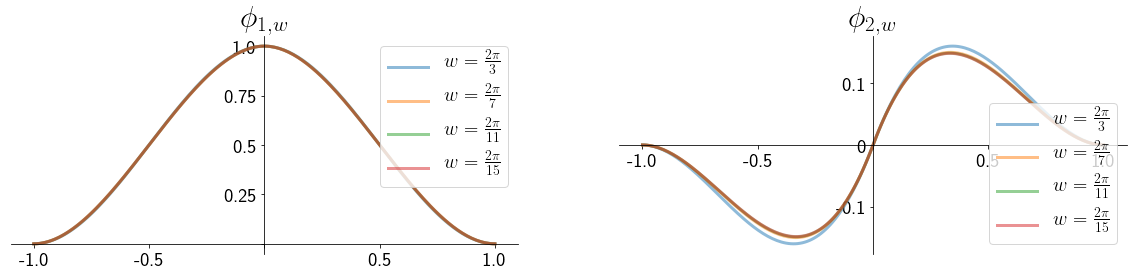

In [5]:
M = np.arange(3, 17, 4)
X = np.linspace(-1, 1, 200)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
for m, color in zip(M, colors):
    ax[0].plot(X, [phi_1(2*np.pi/m, x) for x in X], lw=3, color=color, label=r'$w=\frac{2\pi}{%d}$' % m, alpha=0.5)
    ax[1].plot(X, [phi_2(2*np.pi/m, x) for x in X], lw=3, color=color, label=r'$w=\frac{2\pi}{%d}$' % m, alpha=0.5)

       
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].spines['left'].set_position('center')
ax[0].spines['bottom'].set_position('zero')
ax[0].spines['right'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[0].xaxis.set_ticks_position('bottom')
ax[0].yaxis.set_ticks_position('left')    

ax[0].tick_params(axis='both', labelsize=20)
ax[0].legend(loc='upper right', fontsize=20)
ax[0].set_title(r'$\phi_{1,w}$', fontsize=30)

ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].spines['left'].set_position('center')
ax[1].spines['bottom'].set_position('zero')
ax[1].spines['right'].set_color('none')
ax[1].spines['top'].set_color('none')
ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')    
ax[1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2g'))

ax[1].tick_params(axis='both', labelsize=20)
ax[1].legend(loc='lower right', fontsize=20)
ax[1].set_title(r'$\phi_{2,w}$', fontsize=30)

plt.show(fig)

### 1st derivative

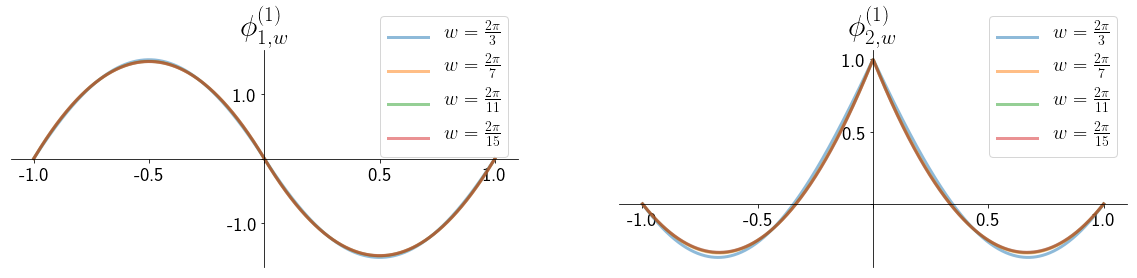

In [6]:
M = np.arange(3, 17, 4)
X = np.linspace(-1, 1, 1000)
r = 1

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
for m, color in zip(M, colors):
    f1 = lambda x: phi_1(2*np.pi/m, x)
    f2 = lambda x: phi_2(2*np.pi/m, x)
    ax[0].plot(X, [d_operator(f1, x, r) for x in X], lw=3, color=color, label=r'$w=\frac{2\pi}{%d}$' % m, alpha=0.5)
    ax[1].plot(X, [d_operator(f2, x, r) for x in X], lw=3, color=color, label=r'$w=\frac{2\pi}{%d}$' % m, alpha=0.5)
    
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].spines['left'].set_position('center')
ax[0].spines['bottom'].set_position('zero')
ax[0].spines['right'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[0].xaxis.set_ticks_position('bottom')
ax[0].yaxis.set_ticks_position('left')

ax[0].tick_params(axis='both', labelsize=20)
ax[0].legend(loc='upper right', fontsize=20, bbox_to_anchor=(1, 1.2))
ax[0].set_title(r'$\phi_{1,w}^{(%d)}$' % r, fontsize=30)

ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].spines['left'].set_position('center')
ax[1].spines['bottom'].set_position('zero')
ax[1].spines['right'].set_color('none')
ax[1].spines['top'].set_color('none')
ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')

ax[1].tick_params(axis='both', labelsize=20)
ax[1].legend(loc='upper right', fontsize=20, bbox_to_anchor=(1, 1.2))
ax[1].set_title(r'$\phi_{2,w}^{(%d)}$' % r, fontsize=30)

plt.subplots_adjust(hspace=0.3)
plt.show(fig)

### 2nd derivative

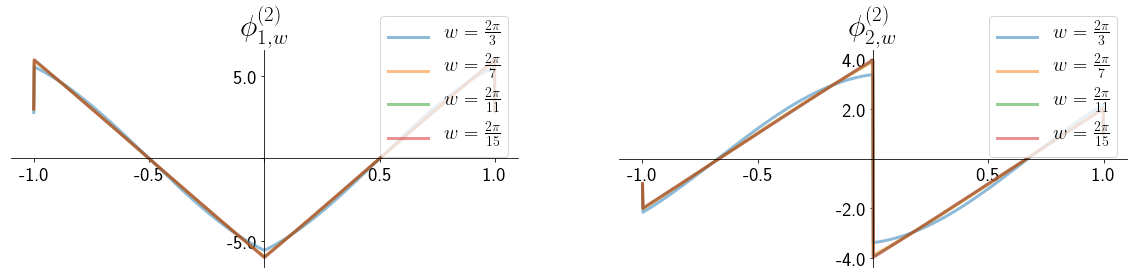

In [7]:
M = np.arange(3, 17, 4)
X = np.linspace(-1, 1, 1000)
r = 2

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
for m, color in zip(M, colors):
    f1 = lambda x: phi_1(2*np.pi/m, x)
    f2 = lambda x: phi_2(2*np.pi/m, x)
    ax[0].plot(X, [d_operator(f1, x, r) for x in X], lw=3, color=color, label=r'$w=\frac{2\pi}{%d}$' % m, alpha=0.5)
    ax[1].plot(X, [d_operator(f2, x, r) for x in X], lw=3, color=color, label=r'$w=\frac{2\pi}{%d}$' % m, alpha=0.5)
    
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].spines['left'].set_position('center')
ax[0].spines['bottom'].set_position('zero')
ax[0].spines['right'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[0].xaxis.set_ticks_position('bottom')
ax[0].yaxis.set_ticks_position('left')

ax[0].tick_params(axis='both', labelsize=20)
ax[0].legend(loc='upper right', fontsize=20, bbox_to_anchor=(1, 1.2))
ax[0].set_title(r'$\phi_{1,w}^{(%d)}$' % r, fontsize=30)

ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].spines['left'].set_position('center')
ax[1].spines['bottom'].set_position('zero')
ax[1].spines['right'].set_color('none')
ax[1].spines['top'].set_color('none')
ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')

ax[1].tick_params(axis='both', labelsize=20)
ax[1].legend(loc='upper right', fontsize=20, bbox_to_anchor=(1, 1.2))
ax[1].set_title(r'$\phi_{2,w}^{(%d)}$' % r, fontsize=30)

plt.subplots_adjust(hspace=0.3)
plt.show(fig)

# II. Basis generators used in Virginie Uhlmann's Hermite Snakes with Control of Tangents

In [8]:
def hphi_1(x):
    if 1 <= np.abs(x):
        return 0
    else:
        return 1 - 3*x**2 + 2*np.abs(x)**3

def hphi_2(x):
    if 1 <= np.abs(x):
        return 0
    else:
        if 0 <= x:
            return x - 2*x**2 + x**3
        else:
            return x + 2*x**2 + x**3

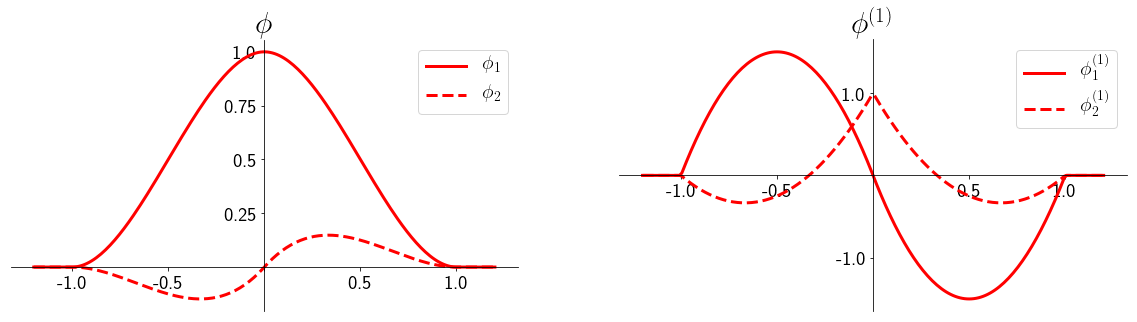

In [9]:
X = np.linspace(-1.2, 1.2, 200)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
ax[0].plot(X, [hphi_1(x) for x in X], color='red', lw=3, label=r'$\phi_1$')
ax[1].plot(X, [d_operator(hphi_1, x, 1) for x in X], color='red', lw=3, label=r'$\phi_1^{(1)}$')
ax[0].plot(X, [hphi_2(x) for x in X], color='red', lw=3, ls='--', label=r'$\phi_2$')
ax[1].plot(X, [d_operator(hphi_2, x, 1) for x in X], color='red', ls='--', lw=3, label=r'$\phi_2^{(1)}$')
    
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].spines['left'].set_position('center')
ax[0].spines['bottom'].set_position('zero')
ax[0].spines['right'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[0].xaxis.set_ticks_position('bottom')
ax[0].yaxis.set_ticks_position('left')    
ax[0].tick_params(axis='both', labelsize=20)
ax[0].legend(loc='upper right', bbox_to_anchor=(1.,1.2), fontsize=20)
ax[0].tick_params(axis='both', labelsize=20)
ax[0].legend(loc='best', fontsize=20)
ax[0].set_title(r'$\phi$', fontsize=30)

ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].spines['left'].set_position('center')
ax[1].spines['bottom'].set_position('zero')
ax[1].spines['right'].set_color('none')
ax[1].spines['top'].set_color('none')
ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')  
ax[1].tick_params(axis='both', labelsize=20)
ax[1].legend(loc='lower right', bbox_to_anchor=(1, -.2), fontsize=20)
ax[1].tick_params(axis='both', labelsize=20)
ax[1].legend(loc='best', fontsize=20)
ax[1].set_title(r'$\phi^{(1)}$', fontsize=30)

fig.savefig("../lab_meeting/presentation_1/hermite_uhl.png")
plt.show(fig)

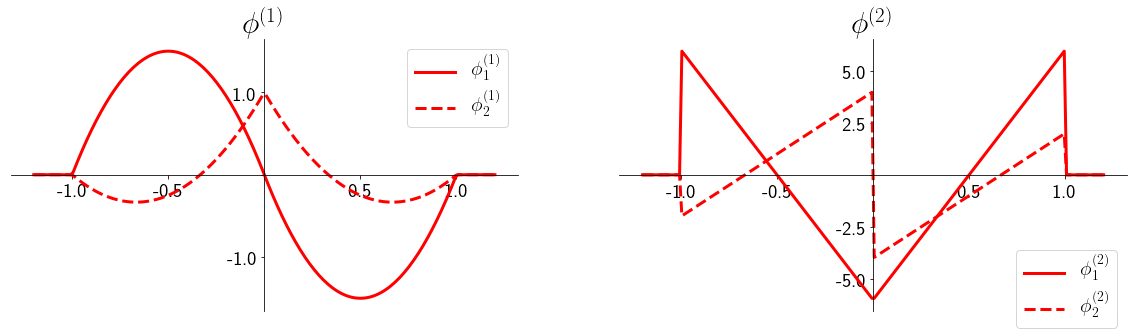

In [10]:
X = np.linspace(-1.2, 1.2, 200)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
ax[0].plot(X, [d_operator(hphi_1, x, 1) for x in X], color='red', lw=3, label=r'$\phi_1^{(1)}$')
ax[1].plot(X, [d_operator(hphi_1, x, 2) for x in X], color='red', lw=3, label=r'$\phi_1^{(2)}$')
ax[0].plot(X, [d_operator(hphi_2, x, 1) for x in X], color='red', lw=3, ls='--', label=r'$\phi_2^{(1)}$')
ax[1].plot(X, [d_operator(hphi_2, x, 2) for x in X], color='red', ls='--', lw=3, label=r'$\phi_2^{(2)}$')
    
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].spines['left'].set_position('center')
ax[0].spines['bottom'].set_position('zero')
ax[0].spines['right'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[0].xaxis.set_ticks_position('bottom')
ax[0].yaxis.set_ticks_position('left')    
ax[0].tick_params(axis='both', labelsize=20)
ax[0].legend(loc='upper right', bbox_to_anchor=(1.,1.), fontsize=20)
ax[0].set_title(r'$\phi^{(1)}$', fontsize=30)

ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].spines['left'].set_position('center')
ax[1].spines['bottom'].set_position('zero')
ax[1].spines['right'].set_color('none')
ax[1].spines['top'].set_color('none')
ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')  
ax[1].tick_params(axis='both', labelsize=20)
ax[1].legend(loc='lower right', bbox_to_anchor=(1, -.1), fontsize=20)
ax[1].set_title(r'$\phi^{(2)}$', fontsize=30)

fig.savefig("../notes/twist/hermite_order_2.png")
plt.show(fig)

### Compute areas

In [26]:
def integral(a, b, f, h):
    X = np.r_[a:b:h]
    I = 0
    for x in X[:-1]:
        I += h*f(x)
    return I

In [37]:
176400/105

1680.0

In [46]:
176400/(105*140)

12.0

In [47]:
176400/(105*105)

16.0

# III. Comparison exponential and polynomial Hermites

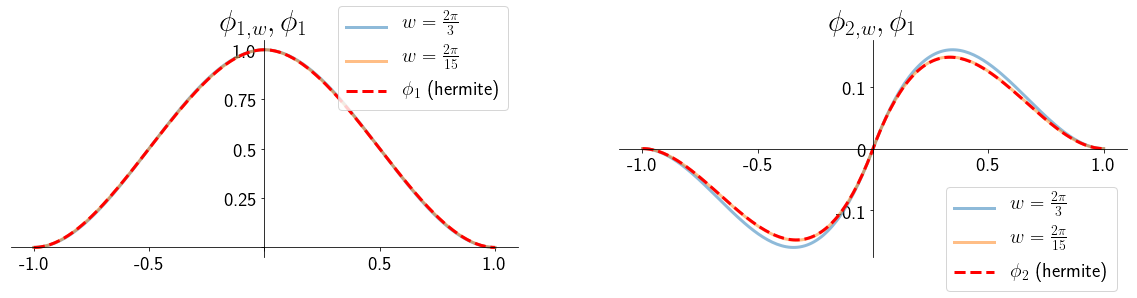

In [11]:
M = [3, 15]
X = np.linspace(-1, 1, 200)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
for m, color in zip(M, colors):
    ax[0].plot(X, [phi_1(2*np.pi/m, x) for x in X], color=color, lw=3, label=r'$w=\frac{2\pi}{%d}$' % m, alpha=0.5)
    ax[1].plot(X, [phi_2(2*np.pi/m, x) for x in X], color=color, lw=3, label=r'$w=\frac{2\pi}{%d}$' % m, alpha=0.5)
    
ax[0].plot(X, [hphi_1(x) for x in X], ls='--', lw=3, color='red', label=r'$\phi_1$ (hermite)')
ax[1].plot(X, [hphi_2(x) for x in X], ls='--', lw=3, color='red', label=r'$\phi_2$ (hermite)')
    
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].spines['left'].set_position('center')
ax[0].spines['bottom'].set_position('zero')
ax[0].spines['right'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[0].xaxis.set_ticks_position('bottom')
ax[0].yaxis.set_ticks_position('left')    
ax[0].tick_params(axis='both', labelsize=20)
ax[0].legend(loc='upper right', bbox_to_anchor=(1.,1.2), fontsize=20)
ax[0].set_title(r'$\phi_{1,w}, \phi_1$', fontsize=30)

ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2g'))
ax[1].spines['left'].set_position('center')
ax[1].spines['bottom'].set_position('zero')
ax[1].spines['right'].set_color('none')
ax[1].spines['top'].set_color('none')
ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')  
ax[1].tick_params(axis='both', labelsize=20)
ax[1].legend(loc='lower right', bbox_to_anchor=(1, -.2), fontsize=20)
ax[1].set_title(r'$\phi_{2,w}, \phi_1$', fontsize=30)

plt.show(fig)

## Estimated first derivative comparison

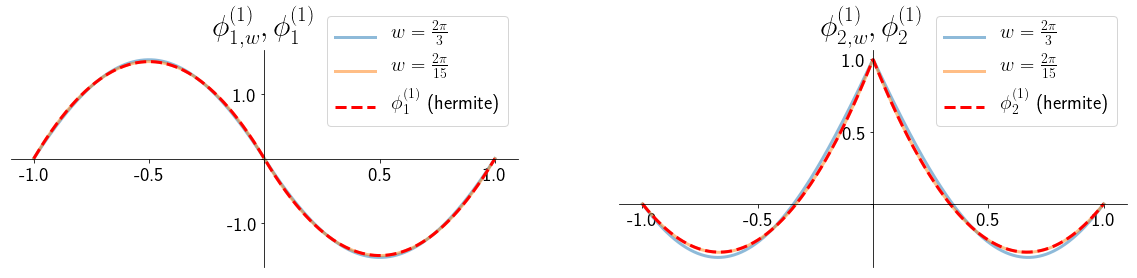

In [12]:
M = [3, 15]
X = np.linspace(-1, 1, 1000)
r = 1

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
for m, color in zip(M, colors):
    f1 = lambda x: phi_1(2*np.pi/m, x)
    f2 = lambda x: phi_2(2*np.pi/m, x)
    ax[0].plot(X, [d_operator(f1, x, r) for x in X], lw=3, color=color, label=r'$w=\frac{2\pi}{%d}$' % m, alpha=0.5)
    ax[1].plot(X, [d_operator(f2, x, r) for x in X], lw=3, color=color, label=r'$w=\frac{2\pi}{%d}$' % m, alpha=0.5)
    

ax[0].plot(X, [d_operator(hphi_1, x, r) for x in X], lw=3, ls='--', color='red', label=r'$\phi_1^{(%d)}$ (hermite)' % r)
ax[1].plot(X, [d_operator(hphi_2, x, r) for x in X], lw=3, ls='--', color='red', label=r'$\phi_2^{(%d)}$ (hermite)' % r)
    
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].spines['left'].set_position('center')
ax[0].spines['bottom'].set_position('zero')
ax[0].spines['right'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[0].xaxis.set_ticks_position('bottom')
ax[0].yaxis.set_ticks_position('left')    
ax[0].tick_params(axis='both', labelsize=20)
ax[0].legend(loc='upper right', bbox_to_anchor=(1.,1.2), fontsize=20)
ax[0].set_title(r'$\phi_{1,w}^{(%d)}, \phi_1^{(%d)}$' % (r,r), fontsize=30)

ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].spines['left'].set_position('center')
ax[1].spines['bottom'].set_position('zero')
ax[1].spines['right'].set_color('none')
ax[1].spines['top'].set_color('none')
ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')  
ax[1].tick_params(axis='both', labelsize=20)
ax[1].legend(loc='upper right', bbox_to_anchor=(1, 1.2), fontsize=20)
ax[1].set_title(r'$\phi_{2,w}^{(%d)},\phi_2^{(%d)}$' % (r,r), fontsize=30)

plt.subplots_adjust(hspace=0.3)
plt.show(fig)

## Estimated second derivative comparison

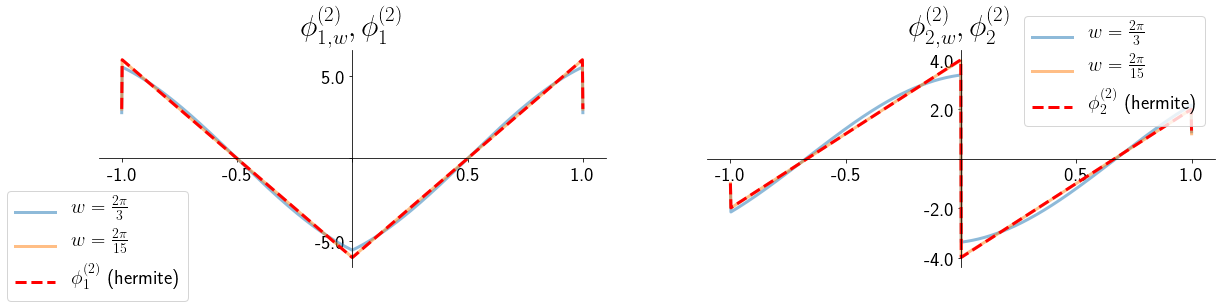

In [13]:
M = [3, 15]
X = np.linspace(-1, 1, 1000)
r = 2

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
for m, color in zip(M, colors):
    f1 = lambda x: phi_1(2*np.pi/m, x)
    f2 = lambda x: phi_2(2*np.pi/m, x)
    ax[0].plot(X, [d_operator(f1, x, r) for x in X], lw=3, color=color, label=r'$w=\frac{2\pi}{%d}$' % m, alpha=0.5)
    ax[1].plot(X, [d_operator(f2, x, r) for x in X], lw=3, color=color, label=r'$w=\frac{2\pi}{%d}$' % m, alpha=0.5)
    

ax[0].plot(X, [d_operator(hphi_1, x, r) for x in X], lw=3, ls='--', color='red', label=r'$\phi_1^{(%d)}$ (hermite)' % r)
ax[1].plot(X, [d_operator(hphi_2, x, r) for x in X], lw=3, ls='--', color='red', label=r'$\phi_2^{(%d)}$ (hermite)' % r)
    
    
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].spines['left'].set_position('center')
ax[0].spines['bottom'].set_position('zero')
ax[0].spines['right'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[0].xaxis.set_ticks_position('bottom')
ax[0].yaxis.set_ticks_position('left')    
ax[0].tick_params(axis='both', labelsize=20)
ax[0].legend(loc='lower left', bbox_to_anchor=(-.2, -.2), fontsize=20)

ax[0].set_title(r'$\phi_{1,w}^{(%d)}, \phi_1^{(%d)}$' % (r,r), fontsize=30)

ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].spines['left'].set_position('center')
ax[1].spines['bottom'].set_position('zero')
ax[1].spines['right'].set_color('none')
ax[1].spines['top'].set_color('none')
ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')  
ax[1].tick_params(axis='both', labelsize=20)
ax[1].legend(loc='upper right', bbox_to_anchor=(1, 1.2), fontsize=20)

ax[1].set_title(r'$\phi_{2,w}^{(%d)},\phi_2^{(%d)}$' % (r,r), fontsize=30)

plt.subplots_adjust(hspace=0.3)
plt.show(fig)

### Gram matrix

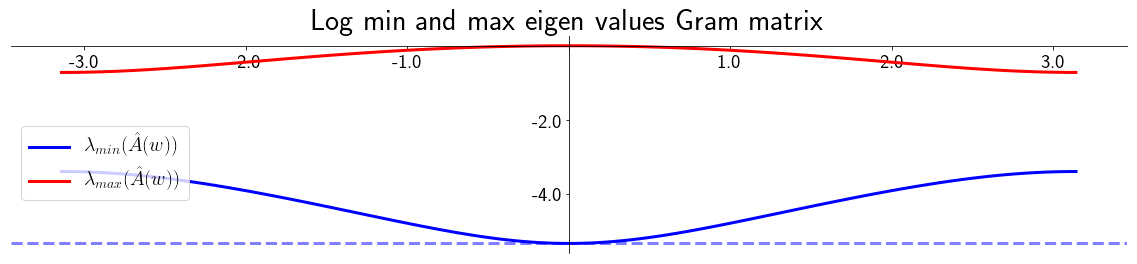

In [14]:
def A_H1(w):
    a = 26/35 + 9*np.exp(-w*1j)/70 + 9*np.exp(w*1j)/70
    b = -13*np.exp(-w*1j)/420 + 13*np.exp(w*1j)/420
    c = 13*np.exp(-w*1j)/420 - 13*np.exp(w*1j)/420
    d = 2/105 -  np.exp(-w*1j)/140 - np.exp(w*1j)/140
    return np.array([[a, b], [c,d]])

W = np.linspace(-np.pi, np.pi, 100)
Lmin = []
Lmax = []

for w in W:
    A = A_H1(w)
    eigval = np.linalg.eigh(A)[0]
    Lmin.append(min(eigval))
    Lmax.append(max(eigval))
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
ax.plot(W, np.log(Lmin), lw=3, ls='-', color='blue', label=r'$\lambda_{min}(\hat{A}(w))$')
ax.plot(W, np.log(Lmax), lw=3, ls='-', color='red', label=r'$\lambda_{max}(\hat{A}(w))$')
ax.axhline(y=np.log(1/210), lw=3, ls='--', color='blue', alpha=0.5)
    
ax.xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')    
ax.tick_params(axis='both', labelsize=20)
ax.legend(loc='lower left', bbox_to_anchor=(0, .2), fontsize=20)

ax.set_title("Log min and max eigen values Gram matrix", fontsize=30)
plt.show(fig)    

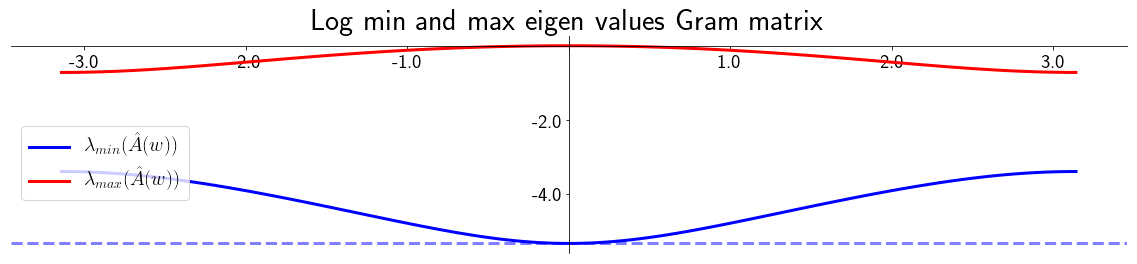

In [15]:
def A_H1(w):
    a = 26/35 + 9*np.exp(-w*1j)/70 + 9*np.exp(w*1j)/70
    b = -13*np.exp(-w*1j)/420 + 13*np.exp(w*1j)/420
    c = 13*np.exp(-w*1j)/420 - 13*np.exp(w*1j)/420
    d = 2/105 -  np.exp(-w*1j)/140 - np.exp(w*1j)/140
    return np.array([[a, 0, b, 0], [0, a, 0, b], [c, 0, d, 0], [0, c, 0, d]])

W = np.linspace(-np.pi, np.pi, 100)
Lmin = []
Lmax = []

for w in W:
    A = A_H1(w)
    eigval = np.linalg.eigh(A)[0]
    Lmin.append(min(eigval))
    Lmax.append(max(eigval))
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
ax.plot(W, np.log(Lmin), lw=3, ls='-', color='blue', label=r'$\lambda_{min}(\hat{A}(w))$')
ax.plot(W, np.log(Lmax), lw=3, ls='-', color='red', label=r'$\lambda_{max}(\hat{A}(w))$')
ax.axhline(y=np.log(1/210), lw=3, ls='--', color='blue', alpha=0.5)
    
ax.xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')    
ax.tick_params(axis='both', labelsize=20)
ax.legend(loc='lower left', bbox_to_anchor=(0, .2), fontsize=20)

ax.set_title("Log min and max eigen values Gram matrix", fontsize=30)
plt.show(fig)    

# IV. Hermite Polynomial order 2

In notations used by Schoenberg, we consider the case $r=3$ and $m=3$. For such settings basis generators for interpolation the function and its derivatives of order 1 and 2 are

\begin{align}
  L_0(x) &= 1 + a_1 x^3 + a_2 x^4 + a_3 x^5 \\
  L_1(x) &= x + a_1 x^3 + a_2 x^4 + a_3 x^5 \\
  L_2(x) &= \frac{1}{2}x^2 + a_1 x^3 + a_2 x^4 + a_3 x^5 \\
\end{align}

The values of the coefficients are simply obtained by solving linear systems of 3 equations as follows.

### $L_0$

In [16]:
# We solve the sysem SA = B
S = np.array([[1,1,1],
              [3,4,5],
              [3,6,10]], dtype=float)
B = np.array([[-1], [0], [0]], dtype=float)
A0 = np.linalg.inv(S).dot(B)

def L_0(x):
    assert 0 <= x
    if 1 < x:
        return 0
    else:
        return 1 + A0[0]*x**3 + A0[1]*x**4 + A0[2]*x**5
    
def hhphi_1(x):
    if 1 <= np.abs(x):
        return 0
    else:
        return L_0(np.abs(x))

\begin{equation}
  L_0(x) = 1 - 10 x^3 + 15 x^4 - 6 x^5 
\end{equation}

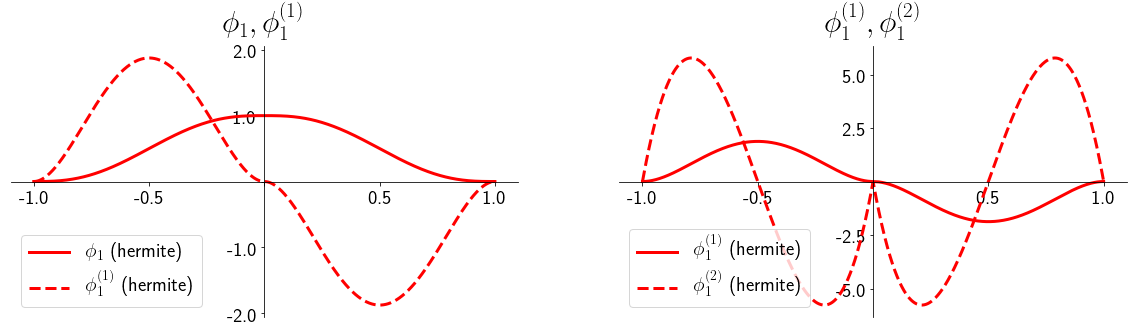

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
X = np.linspace(-1, 1, 1000)

r = 1
ax[0].plot(X, [d_operator(hhphi_1, x, 0) for x in X], lw=3, ls='-', color='red', label=r'$\phi_1$ (hermite)')
ax[0].plot(X, [d_operator(hhphi_1, x, r) for x in X], lw=3, ls='--', color='red', label=r'$\phi_1^{(%d)}$ (hermite)' % r)
   
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].spines['left'].set_position('center')
ax[0].spines['bottom'].set_position('zero')
ax[0].spines['right'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[0].xaxis.set_ticks_position('bottom')
ax[0].yaxis.set_ticks_position('left')    
ax[0].tick_params(axis='both', labelsize=20)
ax[0].legend(loc='best', fontsize=20)

ax[0].set_title(r'$\phi_{1}, \phi_1^{(%d)}$' % (r), fontsize=30)

r = 2
ax[1].plot(X, [d_operator(hhphi_1, x, r-1) for x in X], lw=3, ls='-', color='red', label=r'$\phi_1^{(%d)}$ (hermite)' % (r-1))
ax[1].plot(X, [d_operator(hhphi_1, x, r) for x in X], lw=3, ls='--', color='red', label=r'$\phi_1^{(%d)}$ (hermite)' % r)
    
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].spines['left'].set_position('center')
ax[1].spines['bottom'].set_position('zero')
ax[1].spines['right'].set_color('none')
ax[1].spines['top'].set_color('none')
ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')    
ax[1].tick_params(axis='both', labelsize=20)
ax[1].legend(loc='lower left', fontsize=20)

ax[1].set_title(r'$\phi_1^{(%d)}, \phi_1^{(%d)}$' % (r-1, r), fontsize=30)

plt.show(fig)

### $L_1$

In [18]:
# We solve the sysem SA = B
S = np.array([[1,1,1],
              [3,4,5],
              [3,6,10]], dtype=float)
B = np.array([[-1], [-1], [0]], dtype=float)
A1 = np.linalg.inv(S).dot(B)

def L_1(x):
    assert 0 <= x
    if 1 < x:
        return 0
    else:
        return x + A1[0]*x**3 + A1[1]*x**4 + A1[2]*x**5
    
def hhphi_2(x):
    if 1 <= np.abs(x):
        return 0
    else:
        if 0 <= x:
            return L_1(x)
        else:
            return -L_1(-x)

\begin{equation}
  L_1(x) = x - 6 x^3 + 8 x^4 - 3 x^5 
\end{equation}

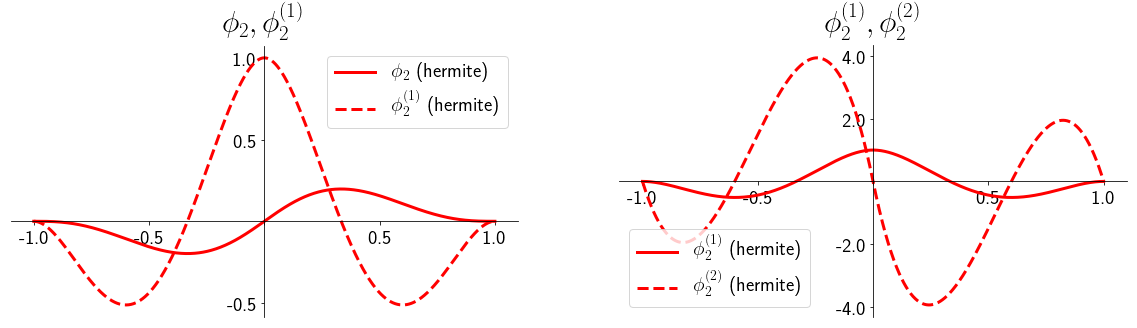

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
X = np.linspace(-1, 1, 1000)

r = 1
ax[0].plot(X, [d_operator(hhphi_2, x, 0) for x in X], lw=3, ls='-', color='red', label=r'$\phi_2$ (hermite)')
ax[0].plot(X, [d_operator(hhphi_2, x, r) for x in X], lw=3, ls='--', color='red', label=r'$\phi_2^{(%d)}$ (hermite)' % r)
   
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].spines['left'].set_position('center')
ax[0].spines['bottom'].set_position('zero')
ax[0].spines['right'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[0].xaxis.set_ticks_position('bottom')
ax[0].yaxis.set_ticks_position('left')    
ax[0].tick_params(axis='both', labelsize=20)
ax[0].legend(loc='best', fontsize=20)

ax[0].set_title(r'$\phi_{2}, \phi_2^{(%d)}$' % (r), fontsize=30)

r = 2
ax[1].plot(X, [d_operator(hhphi_2, x, r-1) for x in X], lw=3, ls='-', color='red', label=r'$\phi_2^{(%d)}$ (hermite)' % (r-1))
ax[1].plot(X, [d_operator(hhphi_2, x, r) for x in X], lw=3, ls='--', color='red', label=r'$\phi_2^{(%d)}$ (hermite)' % r)
    
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].spines['left'].set_position('center')
ax[1].spines['bottom'].set_position('zero')
ax[1].spines['right'].set_color('none')
ax[1].spines['top'].set_color('none')
ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')    
ax[1].tick_params(axis='both', labelsize=20)
ax[1].legend(loc='lower left', fontsize=20)

ax[1].set_title(r'$\phi_2^{(%d)}, \phi_2^{(%d)}$' % (r-1, r), fontsize=30)

plt.show(fig)

### $L_2$

In [20]:
# We solve the sysem SA = B
S = np.array([[1,1,1],
              [3,4,5],
              [3,6,10]], dtype=float)
B = np.array([[-0.5], [-1], [-0.5]], dtype=float)
A2 = np.linalg.inv(S).dot(B)

def L_2(x):
    assert 0 <= x
    if 1 < x:
        return 0
    else:
        return x**2/2 + A2[0]*x**3 + A2[1]*x**4 + A2[2]*x**5
    
def hhphi_3(x):
    if 1 <= np.abs(x):
        return 0
    else:
        if 0 <= x:
            return L_2(x)
        else:
            return L_2(-x)

\begin{equation}
  L_2(x) = \frac{x^2}{2} - 1.5 x^3 + 1.5 x^4 - \frac{1}{2} x^5 
\end{equation}

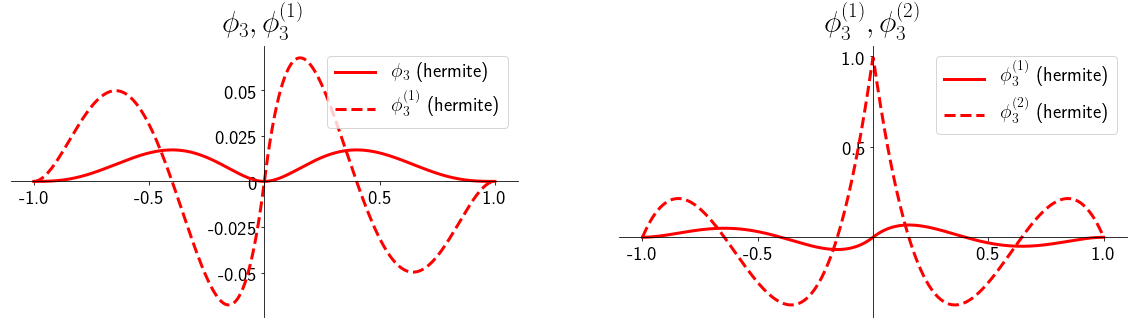

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
X = np.linspace(-1, 1, 1000)

r = 1
ax[0].plot(X, [d_operator(hhphi_3, x, 0) for x in X], lw=3, ls='-', color='red', label=r'$\phi_3$ (hermite)')
ax[0].plot(X, [d_operator(hhphi_3, x, r) for x in X], lw=3, ls='--', color='red', label=r'$\phi_3^{(%d)}$ (hermite)' % r)
   
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[0].spines['left'].set_position('center')
ax[0].spines['bottom'].set_position('zero')
ax[0].spines['right'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[0].xaxis.set_ticks_position('bottom')
ax[0].yaxis.set_ticks_position('left')    
ax[0].tick_params(axis='both', labelsize=20)
ax[0].legend(loc='best', fontsize=20)
ax[0].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2g'))
ax[0].set_title(r'$\phi_{3}, \phi_3^{(%d)}$' % (r), fontsize=30)

r = 2
ax[1].plot(X, [d_operator(hhphi_3, x, r-1) for x in X], lw=3, ls='-', color='red', label=r'$\phi_3^{(%d)}$ (hermite)' % (r-1))
ax[1].plot(X, [d_operator(hhphi_3, x, r) for x in X], lw=3, ls='--', color='red', label=r'$\phi_3^{(%d)}$ (hermite)' % r)
    
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax[1].spines['left'].set_position('center')
ax[1].spines['bottom'].set_position('zero')
ax[1].spines['right'].set_color('none')
ax[1].spines['top'].set_color('none')
ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')    
ax[1].tick_params(axis='both', labelsize=20)
ax[1].legend(loc='upper right', fontsize=20)

ax[1].set_title(r'$\phi_3^{(%d)}, \phi_3^{(%d)}$' % (r-1, r), fontsize=30)

plt.show(fig)

## Comparing all three generators

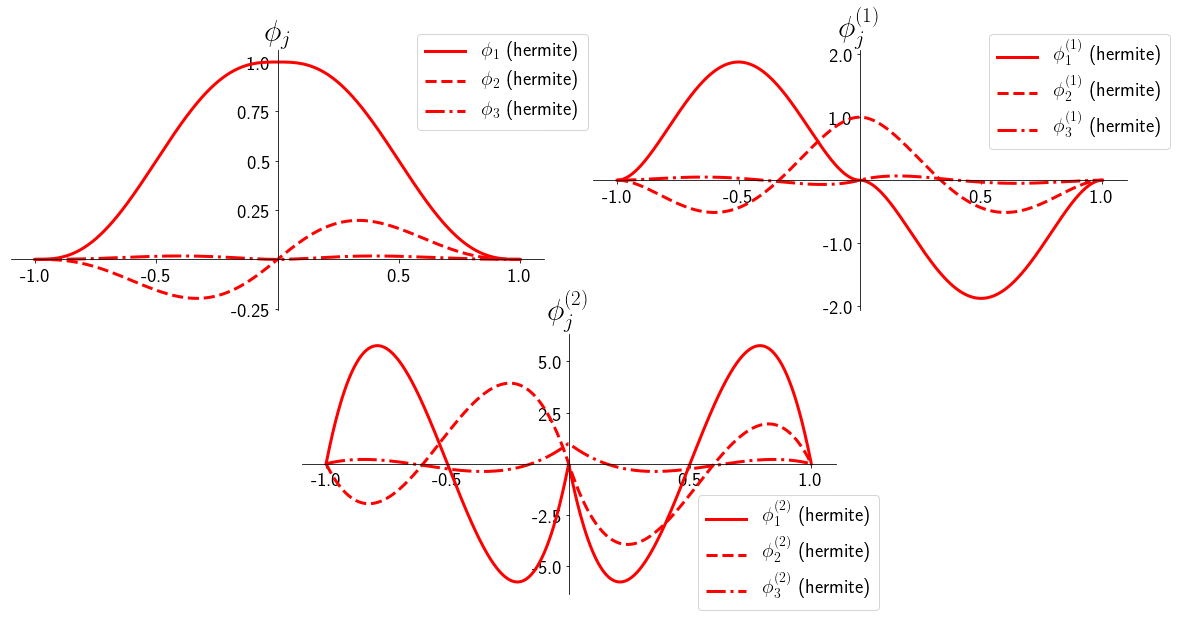

In [22]:
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(4, 4, wspace=0.2, hspace=0.2)
X = np.linspace(-1, 1, 1000)

ax = plt.subplot(gs[:2, :2])
ax.plot(X, [d_operator(hhphi_1, x, 0) for x in X], lw=3, ls='-', color='red', label=r'$\phi_1$ (hermite)')
ax.plot(X, [d_operator(hhphi_2, x, 0) for x in X], lw=3, ls='--', color='red', label=r'$\phi_2$ (hermite)')
ax.plot(X, [d_operator(hhphi_3, x, 0) for x in X], lw=3, ls='-.', color='red', label=r'$\phi_3$ (hermite)')
   
ax.xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')    
ax.tick_params(axis='both', labelsize=20)
ax.legend(loc='upper right', fontsize=20, bbox_to_anchor=(1.1, 1.1))
ax.set_title(r'$\phi_{j}$', fontsize=30)

r = 1
ax = plt.subplot(gs[:2, 2:])
ax.plot(X, [d_operator(hhphi_1, x, r) for x in X], lw=3, ls='-', color='red', label=r'$\phi_1^{(%d)}$ (hermite)' % r)
ax.plot(X, [d_operator(hhphi_2, x, r) for x in X], lw=3, ls='--', color='red', label=r'$\phi_2^{(%d)}$ (hermite)' % r)
ax.plot(X, [d_operator(hhphi_3, x, r) for x in X], lw=3, ls='-.', color='red', label=r'$\phi_3^{(%d)}$ (hermite)' % r )
    
ax.xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')    
ax.tick_params(axis='both', labelsize=20)
ax.legend(loc='upper right', fontsize=20, bbox_to_anchor=(1.1, 1.1))
ax.set_title(r'$\phi_j^{(%d)}$' % r, fontsize=30)

r = 2
ax = plt.subplot(gs[2:4, 1:3])
ax.plot(X, [d_operator(hhphi_1, x, r) for x in X], lw=3, ls='-', color='red', label=r'$\phi_1^{(%d)}$ (hermite)' % r)
ax.plot(X, [d_operator(hhphi_2, x, r) for x in X], lw=3, ls='--', color='red', label=r'$\phi_2^{(%d)}$ (hermite)' % r)
ax.plot(X, [d_operator(hhphi_3, x, r) for x in X], lw=3, ls='-.', color='red', label=r'$\phi_3^{(%d)}$ (hermite)' % r )
    
ax.xaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')    
ax.tick_params(axis='both', labelsize=20)
ax.legend(loc='lower right', fontsize=20, bbox_to_anchor=(1.1, -.1))
ax.set_title(r'$\phi_j^{(%d)}$' % r, fontsize=30)


fig.savefig("../notes/hermite_pol_2/basis.png")
plt.show(fig)

# V. Hermite general order

In [23]:
def fact(n):
    if n==0:
        return 1
    else: 
        return n*fact(n-1)

In [24]:
# We solve the sysem SA = B
r = 4

# Build matrix of the system for m=r
S = np.zeros((r,r))
for i in range(r):
    for j in range(r):
        S[i,j] = fact(r+j)/fact(r+j-i)

# Compute and print each of the fundamental functions L_s
for s in range(0, r):
    B = np.zeros(r)
    for i in range(s+1):
        B[i] = -1/fact(s-i)
        
    # Compute coefficients
    A = np.linalg.inv(S).dot(B)
    
    # Write polynomial
    form = ""
    if s==0:
        form = "1"
    else:
        form = "x^%d/%d" % (s, fact(s))
        
    for i in range(r):
        if A[i] < 0:
            form += "%.2gx^%d" % (A[i], r+i)
        else:
            form += "+%.2gx^%d" % (A[i], r+i)
        
    print("Fundamental function L_%d" % s)
    print(form)

Fundamental function L_0
1-35x^4+84x^5-70x^6+20x^7
Fundamental function L_1
x^1/1-20x^4+45x^5-36x^6+10x^7
Fundamental function L_2
x^2/2-5x^4+10x^5-7.5x^6+2x^7
Fundamental function L_3
x^3/6-0.67x^4+1x^5-0.67x^6+0.17x^7


In [25]:
f = lambda r: fact(2*r-2)/fact(r-1)/2
for r in range(2, 9):
    print('r=%d, %d' % (r, f(r)))

r=2, 1
r=3, 6
r=4, 60
r=5, 840
r=6, 15120
r=7, 332640
r=8, 8648640


In [81]:
seq = [1, 6, 60, 840, 15120, 332640]
seq_bis = []

for a, b in zip(seq[:-1], seq[1:]):
    seq_bis.append(b/a)
    print(b/a)

6.0
10.0
14.0
18.0
22.0


In [83]:
for r in range(2, 8):
    print((2*r)*(2*r-1)/r)

6.0
10.0
14.0
18.0
22.0
26.0


In [93]:
for r in range(2, 8):
    print((2*r)*(2*r-1)/(r-1))

12.0
15.0
18.666666666666668
22.5
26.4
30.333333333333332


In [80]:
seq = [1, 12, 180, 3360, 75600, 1995840]
seq_bis = []

for a, b in zip(seq[:-1], seq[1:]):
    seq_bis.append(b/a)
    print(b/a)

12.0
15.0
18.666666666666668
22.5
26.4


In [98]:
f = lambda r: fact(2*r-4)/fact(r-3)/2
for r in range(3, 9):
    print('r=%d, %d' % (r, f(r)))

r=3, 1
r=4, 12
r=5, 180
r=6, 3360
r=7, 75600
r=8, 1995840


In [102]:
seq = [1, 20, 420, 10080, 277200]

for a, b in zip(seq[:-1], seq[1:]):
    print(b/a)

20.0
21.0
24.0
27.5


In [113]:
for r in range(4, 8):
    print((2*r-3)*(2*r-4)/(r-3))

20.0
21.0
24.0
27.5


In [116]:
f = lambda r: fact(2*r-5)/(6*fact(r-4))
for r in range(4, 9):
    print('r=%d, %d' % (r, f(r)))

r=4, 1
r=5, 20
r=6, 420
r=7, 10080
r=8, 277200


In [117]:
56*450

25200

In [118]:
seq = [1, 30, 840, 25200]

for a, b in zip(seq[:-1], seq[1:]):
    print(b/a)

30.0
28.0
30.0


In [121]:
for r in range(5, 8):
    print((2*r-4)*(2*r-5)/(r-4))

30.0
28.0
30.0


In [124]:
f = lambda r: fact(2*r-6)/(24*fact(r-5))
for r in range(5, 9):
    print('r=%d, %d' % (r, f(r)))

r=5, 1
r=6, 30
r=7, 840
r=8, 25200


In [126]:
f = lambda r: fact(2*r-3)/(fact(r-2))
for r in range(2, 9):
    print('r=%d, %d' % (r, f(r)))

r=2, 1
r=3, 6
r=4, 60
r=5, 840
r=6, 15120
r=7, 332640
r=8, 8648640


In [127]:
f = lambda r: fact(2*r-7)/(fact(r-6)*fact(5))
for r in range(6, 9):
    print('r=%d, %d' % (r, f(r)))

r=6, 1
r=7, 42
r=8, 1512


In [131]:
seq = [6, 120, 840, 60480, 332640,  51891840]

for a, b in zip(seq[:-1], seq[1:]):
    print(b/a)

20.0
7.0
72.0
5.5
156.0


In [205]:
f = lambda r: fact(2*r-1)/(fact(r-1))
for r in range(3, 9):
    print('r=%d, %d' % (r, f(r)))

r=3, 60
r=4, 840
r=5, 15120
r=6, 332640
r=7, 8648640
r=8, 259459200


In [212]:
252*60

15120

### $\phi_3$

In [168]:
seq = [4, 48, 240, 13440, 60480, 7983360, 34594560, 8302694400, 35286451200, 13408851456000]

for a, b in zip(seq[:-1], seq[1:]):
    print(b/a)

12.0
5.0
56.0
4.5
132.0
4.333333333333333
240.0
4.25
380.0


In [169]:
for r in range(2, 11, 2):
    print((2*r)*(2*r-1))

12
56
132
240
380


In [221]:
for r in range(1, 6):
    print(6-(2*r-1)/r)

5.0
4.5
4.333333333333333
4.25
4.2


In [226]:
for r in range(3, 13, 2):
    print((4*r-2)/(r-1))

5.0
4.5
4.333333333333333
4.25
4.2


In [218]:
f1 = lambda r: 4*fact(2*r-3)/(fact(r-2))
f2 = lambda r: 2*fact(2*r-2)/(fact(r-2))
for r in range(2, 9):
    if r%2 == 0:
        print('r=%d, %d' % (r, f1(r)))
    else:
        print('r=%d, %d' % (r, f2(r)))

r=2, 4
r=3, 48
r=4, 240
r=5, 13440
r=6, 60480
r=7, 7983360
r=8, 34594560


### $\sin(w)$

In [220]:
seq = [3, 15, 420, 1890, 166320, 720720, 129729600, 551350800, 63*2660486400, 703964701440]

for a, b in zip(seq[:-1], seq[1:]):
    print(b/a)

5.0
28.0
4.5
88.0
4.333333333333333
180.0
4.25
304.0
4.2


In [227]:
for r in range(2, 13, 2):
    print((4*r+2)/(r))

5.0
4.5
4.333333333333333
4.25
4.2
4.166666666666667


In [235]:
for r in range(3, 13, 2):
    print((2*r+1)*(2*r-2))

28
88
180
304
460


In [264]:
for r in range(2, 13, 2):
    print((2*r-1)*fact(2*r-3)/fact(r-2))

3.0
420.0
166320.0
129729600.0
167610643200.0
323823762662400.0


In [265]:
for r in range(3, 13, 2):
    print(((4*r-2)/(r-1))*(2*r-3)*fact(2*r-5)/fact(r-3))

15.0
1890.0
720720.0
551350800.0
703964701440.0


In [248]:
120/15

8.0

In [249]:
60480/1890

32.0

In [250]:
51891840/720720

72.0

In [48]:
def integral(a, b, f, h):
    X = np.r_[a:b:h]
    I = 0
    for x in X:
        I += h*f(x)
    return I

In [61]:
g0 = lambda x: x*(x-1)**2
g1 = lambda x: x**2*(x-1)
f0 = lambda x: 1-3*x**2 + 2*x**3
f1 = lambda x: 3*x**2 - 2*x**3

In [92]:
f = lambda x: g1(x)*f1(x)
integral(0,1,f,0.0001)

-0.05238095154761874

In [101]:
176400/(120*140)

10.5

In [102]:
-1%3

2